## Introduction to the AGAGE 12-box model

The 12-box model is a simple model of the atmosphere, which can be used to model global emissions and mole fractions of a variety of long-lived greenhouse and ozone-depleting gases. 

The model code can be viewed at [this link](github.com/mrghg/py12box), and there is documentation and information about how the model works available there, too. Here we will take a look at some things the box model can do with an example gas (CFC-11)

The package can be installed in your conda environment by running

`conda install -c mrghg py12box` 

or equivalently using pip: 

`pip install py12box`

### Getting set up

The model requires two inputs in order to model mole fractions. These are initial conditions - which describe the amount of the species in each box at the start of the run - and emissions, which give the amount of the species emitted in each *surface* box at each time step of the run. In this case, I have adapted the example (fake) CFC-11 emissions and initial conditions from the py12box documentation, and these files are in the data directory of this repository. The files are in .csv format - simple and readily accessible to both humans and computers. Let's take a look at these, using the pandas `read_csv` function:

In [50]:
import pandas as pd
emissions = pd.read_csv('../data/CFC-11_emissions.csv', skiprows=2)
emissions

,year,box_0,box_1,box_2,box_3
0,1990,100,10,0,0
1,1991,100,10,0,0
2,1992,100,10,0,0
3,1993,100,10,0,0
4,1994,100,10,0,0
5,1995,100,10,0,0
6,1996,100,10,0,0
7,1997,100,10,0,0
8,1998,100,10,0,0
9,1999,100,10,0,0


Clearly, we're working with CFC-11 emissions of 110 Gg / yr for 1990-1999, emitted in boxes 0 and 1 (which correspond to the northern hemisphere), then zero emissions for 2000-2020. This is roughly in line with what we expect from accordance with the Montreal Protocol, although that doesn't matter here - we're just testing the model! Note that the model doesn't 'know' the emissions - we've put them in the header of the CSV file for our reference. The model uses a default unit of ppt for mole fractions for the F-gases (with a few exceptions) and Gg / yr for emissions. 

In [51]:
initial_conditions = pd.read_csv('../data/CFC-11_initial_conditions.csv', skiprows=1)
initial_conditions

,box_0,box_1,box_2,box_3,box_4,box_5,box_6,box_7,box_8,box_9,box_10,box_11
0,200,200,200,200,200,200,200,200,150,150,150,150


The initial conditions (in ppt) look reasonable, too. Now that we've got the inputs setup, let's try run the model!

### Running the model

We need to import the Model class, which actually does the modelling and calculations. We also need to use the Path class to point to the directory where we've stored our input data - in this case, the data directory. Everything else the model needs - like atmospheric lifetimes and rate constants - it already has access to. So we're ready to compile it:

In [52]:
# import the Model class and get_data function from the py12box package

from py12box.model import Model

# we also need to set the correct path to our data directory using the pathlib.Path class

from pathlib import Path

data_dir = Path('../data') # the ".." tells the Path class to go to the parent directory of the directory this notebook is being run from (i.e. notebooks)

mod = Model(species="CFC-11",
            project_directory=data_dir)

Compiling model and tuning lifetime...
... completed in 3 iterations
... stratospheric lifetime: 55.0
... OH lifetime: 1e12
... ocean lifetime: 1e12
... non-OH tropospheric lifetime: 1e12
... overall lifetime: 55.0
... done in 0.0003 s


The model is now compiled, and we can look at the inputs to check they're correct. For example, the emissions can be accessed using mod.emissions, and is a numpy array with the emissions in each box, each month of the run. 

In [53]:
mod.emissions

array([[100,  10,   0,   0],
       [100,  10,   0,   0],
       [100,  10,   0,   0],
       ...,
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

Now we can actually run the model:

In [54]:
mod.run()

... done in 0.0142 s


To visualise the outputs, let's use matplotlib (make sure this is also in your conda environment). The key output we're interested in is the mole fraction, which is a numpy array accessed by `mod.mf`. This is calculated for each of the twelve boxes, so make sure you plot up the right one! Other variables (such as time, losses, emissions etc.) can also be accessed easily. I've plotted just box 0 and box 3 for simplicity. 

Text(0, 0.5, '[CFC-11] / ppt')

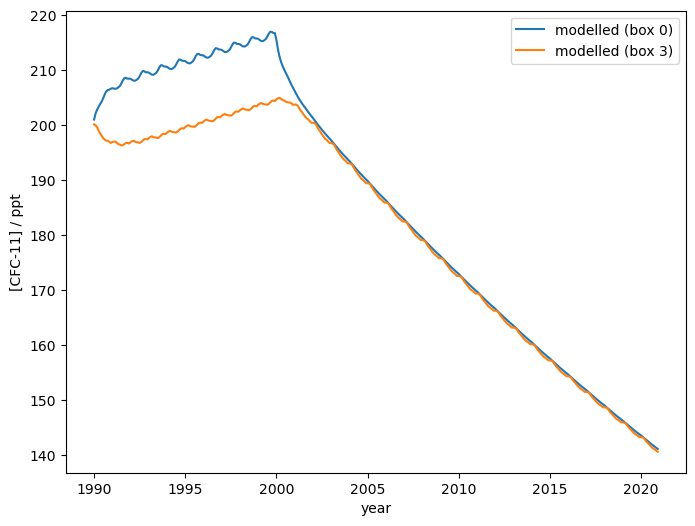

In [55]:
# import matplotlib for plotting

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mod.time, mod.mf[:,0], label='modelled (box 0)')
ax.plot(mod.time, mod.mf[:,3], label='modelled (box 3)')
ax.legend()
ax.set_xlabel('year')
ax.set_ylabel('[CFC-11] / ppt')

Of course, models are only interesting when compared to the real-life data! Let's take a look at some of that, which I've also put in the data directory in .csv form. We can read the file in essentially the same way as the emissions files, although make sure you've checked the raw file and that the commands all make sense. 

In [56]:
# read in the obs

obs = pd.read_csv("../data/CFC-11_obs_agage.csv", header=22, skiprows=[23])
obs = obs.set_index(pd.to_datetime(obs['date']))
obs

,date,mf,mf.1,mf.2,mf.3,mf_variability,mf_variability.1,mf_variability.2,mf_variability.3,sites,sites.1,sites.2,sites.3,instruments,instruments.1,instruments.2,instruments.3
date,,,,,,,,,,,,,,,,,
1990-01-01,1990-01-01,261.8300,257.830,NaN,245.450,1.624931,1.325813,NaN,1.186857,MHD,RPB,NaN,CGO,ALE|,ALE,NaN,ALE
1990-02-01,1990-02-01,262.3400,257.470,NaN,246.220,1.461569,1.421022,NaN,1.074801,MHD,RPB,NaN,CGO,ALE|,ALE,NaN,ALE
1990-03-01,1990-03-01,262.9600,NaN,NaN,247.020,1.509808,NaN,NaN,1.159443,MHD,NaN,NaN,CGO,ALE|,NaN,NaN,ALE
1990-04-01,1990-04-01,263.8600,261.410,NaN,248.270,1.262669,1.470727,NaN,1.292553,MHD,RPB,NaN,CGO,ALE|,ALE,NaN,ALE
1990-05-01,1990-05-01,264.7500,261.300,NaN,248.480,1.414898,1.634378,NaN,1.426520,MHD,RPB,NaN,CGO,ALE|,ALE,NaN,ALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,2020-08-01,223.8520,224.026,NaN,222.496,0.445838,0.438736,NaN,0.408818,THD|MHD,RPB,NaN,CGO,ALE|ALE,ALE,NaN,ALE
2020-09-01,2020-09-01,223.8290,223.829,NaN,222.319,0.468142,0.485632,NaN,0.405174,THD|MHD,RPB,NaN,CGO,ALE|ALE,ALE,NaN,ALE
2020-10-01,2020-10-01,223.9005,223.846,NaN,222.143,0.473420,0.423497,NaN,0.398862,THD|MHD,RPB,NaN,CGO,ALE|ALE,ALE,NaN,ALE


There's a lot of unnecessary information in this file (which is actually modified from the [py12box_agage](https://github.com/mrghg/py12box_agage) repository) but the important thing is the four 'mf' columns, which give the monthly mean mole fractions from the measurement stations in each of the four boxes. Let's make that plot again, but with the measured mole_fractions in box_0 and box_3 on the same plot in order to compare modelled and measured mole fractions:

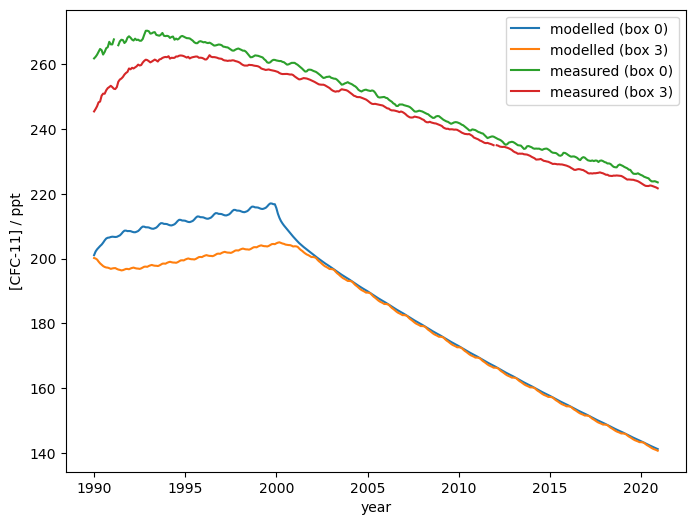

In [58]:
# first need to do a bit of tinkering to convert the pandas datetime index to a decimal date, which is needed for comparison with the model output

obs['decimal_date'] = obs.index.year + (obs.index.dayofyear - 1)/365



fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mod.time, mod.mf[:,0], label='modelled (box 0)')
ax.plot(mod.time, mod.mf[:,3], label='modelled (box 3)')
ax.plot(obs['decimal_date'], obs['mf'], label='measured (box 0)')
ax.plot(obs['decimal_date'], obs['mf.3'], label='measured (box 3)')

ax.set_xlabel('year')
ax.set_ylabel('[CFC-11] / ppt')

ax.legend()